### Loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
csv_file='data/bump_data.csv'
col_names = ["time", "seq", "stamp", "frame_id", "bump"]
df = pd.read_csv(csv_file, names=col_names, header=0, usecols=[4])
df.head(10)

,bump
0,2048
1,0
2,16384
3,0
4,2048
5,0
6,1
7,0
8,2
9,0


### Separating bump data

In [2]:
bdf = pd.DataFrame()

BUMP_SENSORS_COUNT = 15
for i in range(BUMP_SENSORS_COUNT):
    bdf[f"b{i}"] = df["bump"].apply(lambda x: 1 if x & 0x1 << i > 0 else 0)

bdf.head(10)

,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Filtering bump data

In [3]:
fdf = pd.DataFrame()
# for i in range(1, bdf.b0.count()):
for i in range(BUMP_SENSORS_COUNT):
    fdf["tmpb"] = bdf[f"b{i}"]
    fdf["tmp"] = bdf[f"b{i}"].shift(1)
    fdf[f"b{i}"] = fdf.apply(lambda x: 1 if x["tmpb"] == x["tmp"] and x["tmpb"] == 1 else 0, axis=1)
#     fdf["b0"][i] = 1 if bdf["b0"][i] == bdf["b0"][i - 1] else 0

In [4]:
fdf.loc[950:970]

,tmpb,tmp,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14
950,0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
951,0,0.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
952,0,0.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
953,0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
954,0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
955,0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
956,0,0.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
957,0,0.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
958,0,0.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
959,0,0.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0


### Plotting all bump sensors

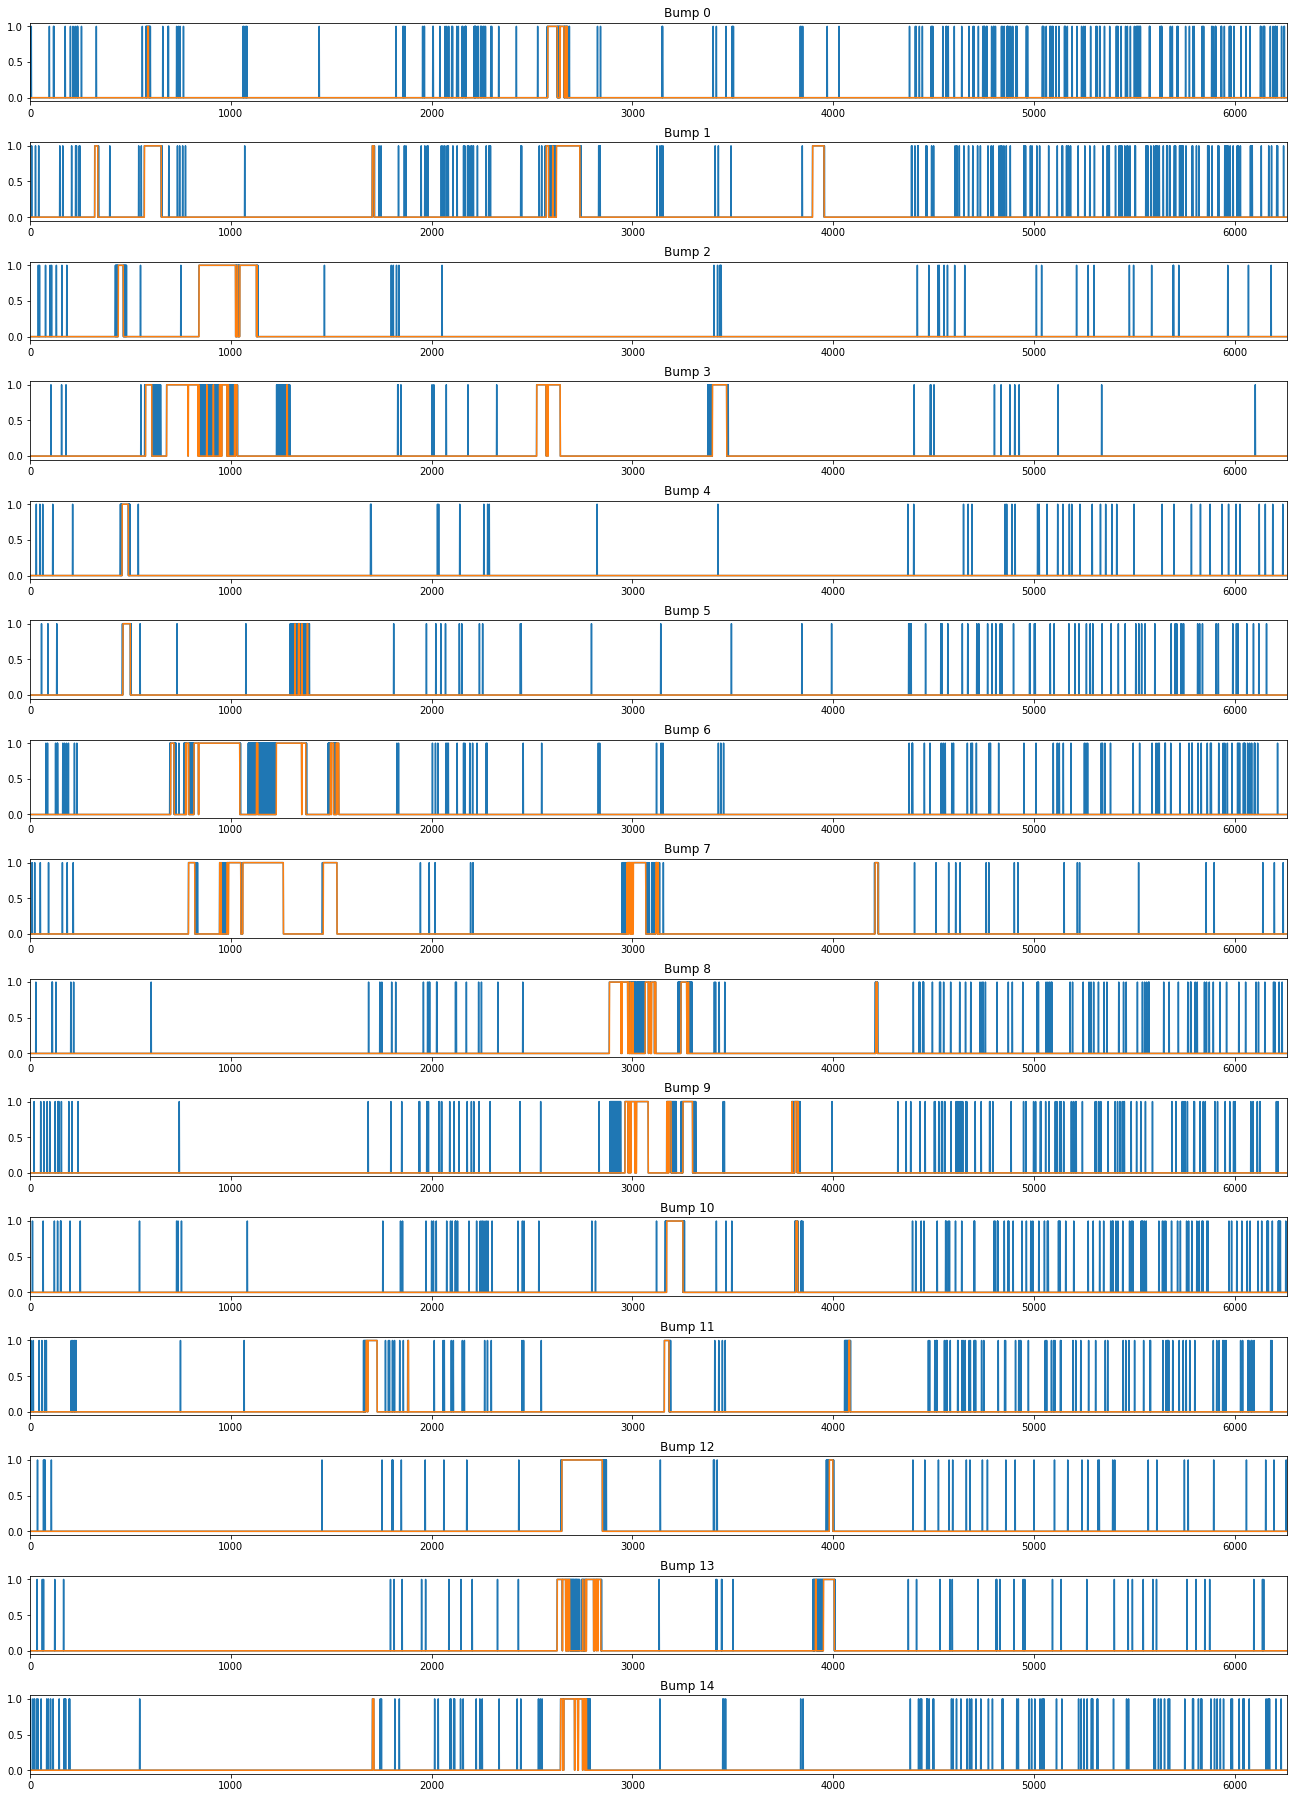

In [5]:
plt.figure(figsize=(18, 25))
start = 0
end = 30000
for i in range(BUMP_SENSORS_COUNT):
    plt.subplot(BUMP_SENSORS_COUNT, 1, i+1)
    plt.title(f"               Bump {i}")
    plt.plot(bdf.index[start:end], bdf[f"b{i}"][start:end])
    plt.plot(fdf.index[start:end], fdf[f"b{i}"][start:end])
    plt.xlim(0, fdf.b0.count())

plt.tight_layout(pad=0.8)
plt.show()